# Project по обработке и визуализации данных


## Цель
Анализ рынка ноутбуков

## Исследуемые данные
Данные взяты с Kaggle.com - датасет: https://www.kaggle.com/datasets/sumanbera19/laptop-price-dataset?resource=download

## Описание
Датасет содержит данные спецификаций различных ноутбуков, включающих бренд, процессор, ОЗУ, ПЗУ, дисплей и другое. Можно использоват для предсказаний цены, рекомендательных систем, анализ свойств и построение моделей машинного обучения.


 Колонка | Определение
--- | -----------
 Model | The name or model of the laptop. This includes details like the brand and the specific series or product name (e.g., “HP Pavilion x360”, “Dell Inspiron 15”).
Price | The selling price of the laptop, likely in Indian Rupees (INR). This is a numerical value and can be used as a target for regression tasks such as price prediction.
Rating | The customer or user rating of the laptop, typically on a scale from 1 to 5 (e.g., 4.2, 3.8). It reflects how users have rated the product.
Generation | This indicates the generation of the processor used in the laptop, such as 10th Gen, 11th Gen, etc. It helps identify the CPU’s performance class.
Core | This specifies the processor family or series, such as Intel i3, i5, i7, or AMD Ryzen 3, Ryzen 5, etc. It’s an important factor in determining processing power.
Ram | The amount of system memory (RAM) the laptop has, like 8GB or 16GB. More RAM generally means better performance, especially for multitasking.
SSD | The size of the Solid-State Drive storage, such as 256GB, 512GB, or sometimes even missing (in which case the laptop might use HDD or no storage info is given).
Display | The screen size and resolution description, usually something like “15.6" FHD” or “14" HD”. It affects the viewing quality and portability of the laptop.
Graphics | The type of graphics card in the laptop. This can be integrated (e.g., Intel UHD Graphics) or dedicated (e.g., NVIDIA GeForce series). Useful for tasks involving gaming or graphics-intensive work.
OS | The operating system installed on the laptop, such as Windows 10, Windows 11, Ubuntu, or DOS. It determines the software environment available to the user.
Warranty | The warranty period provided by the manufacturer, typically 1 year or 2 years. Indicates after-sales service coverage.

На русском

 Колонка | Определение
--- | -----------
 Model | Наименование модели
Price | Цена в индийских рупиях (INR). Числовая колонка, может использоваться в regression tasks such as price prediction.
Rating | Рейтинг покупателей от 1 до 5 (e.g., 4.2, 3.8).
Generation | Поколение процессора в ноутбуке, such as 10th Gen, 11th Gen, etc.
Core | Спецификация процессора - серия модели и тд, such as Intel i3, i5, i7, or AMD Ryzen 3, Ryzen 5. Важно для определния мощности процессора.
Ram | Объем оперативной памяти, like 8GB or 16GB. Чем выше тем больше производительности и мультизадачность
SSD | Объем жесткого диска устройства, such as 256GB, 512GB, or sometimes even missing (in which case the laptop might use HDD or no storage info is given).
Display | Диагональ экрана - “15.6" FHD” or “14" HD”.
Graphics | Тип видеокарты.
OS | Какая ОС установлена на ноутбукк. Such as Windows 10, Windows 11, Ubuntu, or DOS.
Warranty | Гарантия на продукт зависит от произволителя, typically 1 year or 2 years.

💡 Potential Use Cases:

Exploratory Data Analysis (EDA)

Feature engineering practice

Price prediction using regression

Classification tasks (e.g., gaming vs business laptops)

NLP tasks using CPU/GPU descriptions

Recommendation systems

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image, display
import re

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Общие сведения

In [45]:
laptops = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop.csv')

In [46]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Model       920 non-null    object 
 2   Price       920 non-null    object 
 3   Rating      768 non-null    float64
 4   Generation  920 non-null    object 
 5   Core        920 non-null    object 
 6   Ram         920 non-null    object 
 7   SSD         920 non-null    object 
 8   Display     919 non-null    object 
 9   Graphics    920 non-null    object 
 10  OS          919 non-null    object 
 11  Warranty    915 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 86.4+ KB


In [48]:
df.sample()

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
377,377,Acer Aspire 5 A514-56M NX.KH6SI.001 Gaming Lap...,"₹59,900",51.0,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16 GB LPDDR5 RAM,512 GB SSD,"14 inches, 1920 x 1200 pixels",Intel Integrated Iris Xe,Windows 11 OS,1 Year Warranty


In [49]:
# удаляем ненужную колонку
df = df.drop('Unnamed: 0', axis =1)

In [50]:
df.columns

Index(['Model', 'Price', 'Rating', 'Generation', 'Core', 'Ram', 'SSD',
       'Display', 'Graphics', 'OS', 'Warranty'],
      dtype='object')

In [51]:
# посмотрим на количество строк и колонок
df.shape

(920, 11)

## Feature engineering - подготовка данных

In [52]:
# проверяем есть ли дубликаты
df.duplicated().sum()

np.int64(0)

In [53]:
# Выделим бренд модели в отдельную колонку
df['Brand'] = df['Model'].apply(lambda x: x.split()[0])

In [54]:
# меняем вид колонки цены
df['Price'] = df['Price'].apply(lambda x: x[1:].replace(',', '')).astype(int)
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Brand
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,50399,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,HP
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,Tecno
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,26989,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,Lenovo
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,69990,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,Samsung
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,102990,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,64990,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,Asus
916,Asus TUF Gaming A15 2023 FA577XV-HQ036WS Gamin...,154990,NaN,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 2560 x 1440 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,Asus
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,69990,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,Acer
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,54900,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,Lenovo


In [55]:
# конвертируем рупии в usd для для удобства
exchange_rate = 88 # на сегодня
df['Price'] = np.round(df['Price']/exchange_rate, 1)



In [56]:
# выносим числовое значение Оперативной памяти в отдельную колонку
df['Ram_numeric'] = df['Ram'].apply(lambda x: x.split()[0])
df['Ram_value'] = df['Ram'].apply(lambda x: x.split()[1])
df.head()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Brand,Ram_numeric,Ram_value
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,HP,8,GB
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,Tecno,8,GB
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,Lenovo,8,GB
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,Samsung,16,GB
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,Xiaomi,16,GB


In [57]:
# выделяем необычные значения
df['Ram_numeric'].value_counts()

,count
Ram_numeric,
16,512
8,308
32,61
4,17
64,6
18,3
36,3
2,2
1,2


In [58]:
# находим исключение
df[df['Ram_numeric']=='Storage:']

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Brand,Ram_numeric,Ram_value
109,Samsung Galaxy Book2 15 Laptop (12th Gen Core ...,568.1,NaN,Processor: 12th Generation Intel Core i5-1235U...,Memory: 8 GB LPDDR4 Memory (On BD 8 GB),Storage: 512 GB NVMe SSD,Operating System: Windows 11 Home,Display: 15.6 inch (39.6 cm),Preinstalled Software: MS Office Home & Studen...,Intel Iris Xe Graphics,Ports: 1 HDMI,Samsung,Storage:,512


In [59]:
df.iloc[109]

,109
Model,Samsung Galaxy Book2 15 Laptop (12th Gen Core ...
Price,568.1
Rating,NaN
Generation,Processor: 12th Generation Intel Core i5-1235U...
Core,Memory: 8 GB LPDDR4 Memory (On BD 8 GB)
Ram,Storage: 512 GB NVMe SSD
SSD,Operating System: Windows 11 Home
Display,Display: 15.6 inch (39.6 cm)
Graphics,Preinstalled Software: MS Office Home & Studen...
OS,Intel Iris Xe Graphics


In [60]:
df = df.drop(109)

In [61]:
df[df['Ram_numeric']=='Storage:']

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Brand,Ram_numeric,Ram_value


In [62]:
df['Ram_numeric'] = df['Ram_numeric'].astype(int)

In [63]:
# Посмотрим на содержание колонки Гарантия
df['Warranty'].value_counts()

,count
Warranty,
1 Year Warranty,806
2 Year Warranty,74
3 Year Warranty,16
Backlit Keyboard,9
Windows 11 OS,5
1 USB 3.0 Ports,2
2 USB 3.0 Ports,2


In [64]:
# Удаляем строки с некорректными данными
df = df[df['OS'] != 'Backlit Keyboard']
df = df[df['OS'] != '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels']
df = df[df['OS'] != '1 Year Warranty']
df = df[df['OS'] != '2 Year Warranty']
df = df[df['OS'] != 'Intel Iris Xe Graphics']
df = df[df['Ram'] != '64 GB Hard Disk']
df = df[df['Warranty'] != 'Backlit Keyboard']
df = df[df['Warranty'] != '1 USB 3.0 Ports']

In [65]:
df['Warranty'].value_counts()

,count
Warranty,
1 Year Warranty,806
2 Year Warranty,74
3 Year Warranty,16


In [66]:
df.isnull().sum()

,0
Model,0
Price,0
Rating,145
Generation,0
Core,0
Ram,0
SSD,0
Display,0
Graphics,0
OS,0


In [67]:
df['Warranty'] = df['Warranty'].apply(lambda x: x.split()[0])
df.rename(columns={'Warranty': 'Warranty_years'}, inplace=True)

In [174]:
df['Warranty_years'] = df['Warranty_years'].astype(object)

In [69]:
df['Display'].value_counts()

,count
Display,
"15.6 inches, 1920 x 1080 pixels",393
"14 inches, 1920 x 1080 pixels",74
"16 inches, 1920 x 1200 pixels",51
"14 inches, 1920 x 1200 pixels",49
"16 inches, 2560 x 1600 pixels",39
...,...
"16 inches, 1600 x 2560 pixels, Touch Screen",1
"13.4 inches, 3840 x 2400 pixels, Touch Screen",1
"17 inches, 1600 x 2560 pixels",1


In [70]:
df['Diagonal'] = df['Display'].apply(lambda x: x.split()[0]).astype(float)
df.head()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1,HP,8,GB,15.6
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1,Tecno,8,GB,15.6
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1,Lenovo,8,GB,15.6
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Samsung,16,GB,13.3
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Xiaomi,16,GB,16.1


In [71]:
df['SSD'].value_counts()

,count
SSD,
512 GB SSD,611
1 TB SSD,215
256 GB SSD,36
2 TB SSD,17
128 GB SSD,6
128 GB Hard Disk,5
64 GB SSD,3
32 GB Hard Disk,1
4 TB SSD,1


In [72]:
df['SSD_value'] = df['SSD'].apply(lambda x: x.split()[0]).astype(int)
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1,HP,8,GB,15.6,512
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1,Tecno,8,GB,15.6,512
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1,Lenovo,8,GB,15.6,512
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Samsung,16,GB,13.3,512
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Xiaomi,16,GB,16.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,738.5,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Asus,16,GB,16.0,512
916,Asus TUF Gaming A15 2023 FA577XV-HQ036WS Gamin...,1761.2,NaN,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 2560 x 1440 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Asus,16,GB,15.6,1
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,795.3,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Acer,8,GB,14.0,512
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,623.9,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Lenovo,16,GB,15.6,512


In [73]:
df['SSD_value'].value_counts()

,count
SSD_value,
512,611
1,215
256,36
2,17
128,11
64,4
32,1
4,1


In [74]:
# Преобразуем SSD в удобный вид для построения можелей
mask = (df['SSD_value'] == 1) | (df['SSD_value'] == 2) | (df['SSD_value'] == 4)
df.loc[mask, 'SSD_value'] = df.loc[mask, 'SSD_value'] * 1024
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1,HP,8,GB,15.6,512
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1,Tecno,8,GB,15.6,512
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1,Lenovo,8,GB,15.6,512
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Samsung,16,GB,13.3,512
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Xiaomi,16,GB,16.1,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,738.5,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Asus,16,GB,16.0,512
916,Asus TUF Gaming A15 2023 FA577XV-HQ036WS Gamin...,1761.2,NaN,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 2560 x 1440 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Asus,16,GB,15.6,1024
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,795.3,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Acer,8,GB,14.0,512
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,623.9,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Lenovo,16,GB,15.6,512


In [75]:
## разобьем на колонки с ядрами и потоками
df['Core'].value_counts()

,count
Core,
"10 Cores (2P + 8E), 12 Threads",135
"Hexa Core, 12 Threads",100
"Octa Core, 16 Threads",91
"Quad Core, 8 Threads",88
"Octa Core (4P + 4E), 12 Threads",66
"12 Cores (4P + 8E), 16 Threads",65
"Hexa Core (2P + 4E), 8 Threads",59
"14 Cores (6P + 8E), 20 Threads",51
"10 Cores (6P + 4E), 16 Threads",38


In [76]:
# парсинг процессора на 2 колонки с количеством ядер и потоков
def parse_cpu(text):
  if pd.isna(text):
    return pd.Series([np.nan, np.nan])
  cores_match = re.search(r'(\d+)\s*Cores?', text)
  if not cores_match:
    cores_match = re.search(r'(Dual|Quad|Hexa|Octa)\s*Core', text, re.I)
    mapping = {'Dual': 2, 'Quad': 4, 'Hexa': 6, 'Octa': 8}
    cores = mapping.get(cores_match.group(1), np.nan) if cores_match else np.nan
  else:
    cores = int(cores_match.group(1))
  # ищем число перед threads
  threads_match = re.search(r'(\d+)\s*Threads?', text)
  threads = int(threads_match.group(1)) if threads_match else np.nan
  return pd.Series([cores, threads])


In [77]:
df[['CPU_cores', 'CPU_threads']] = df['Core'].apply(parse_cpu)

In [78]:
df['CPU_threads'].isnull().sum()

np.int64(33)

In [79]:
# в нашем случае будем удалять строки с отсутствующими данными, поскольку усредненные значения в дальнейшем могут давать неточные предсказания по ценам
#df = df.dropna(subset=['Rating'])

In [80]:
# Но в некоторых случаях
#df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

Рейтинг пока не обнуляем поскольку .corr() показывает корреляция больше с показателями CPU и RAM

In [81]:
df.shape

(896, 18)

## Визуализация, descriptive statistics - определение распределения цен и других метрик

In [82]:
df.describe()

,Price,Rating,Warranty_years,Ram_numeric,Diagonal,SSD_value,CPU_cores,CPU_threads
count,896.000000,751.000000,896.000000,896.000000,896.000000,896.000000,895.000000,863.000000
mean,959.583594,61.720373,1.118304,14.513393,15.213895,650.464286,8.734078,12.993048
std,769.503643,7.135758,0.374404,7.391664,0.964382,329.465697,4.443117,5.787213
min,90.900000,50.000000,1.000000,2.000000,11.600000,32.000000,2.000000,2.000000
25%,513.050000,56.000000,1.000000,8.000000,14.000000,512.000000,6.000000,8.000000
50%,738.500000,62.000000,1.000000,16.000000,15.600000,512.000000,8.000000,12.000000
75%,1088.250000,66.000000,1.000000,16.000000,15.600000,1024.000000,10.000000,16.000000
max,5909.000000,79.000000,3.000000,64.000000,18.000000,4096.000000,24.000000,32.000000


In [83]:
laptops['Rating'].isnull().sum()
laptops.shape

(920, 12)

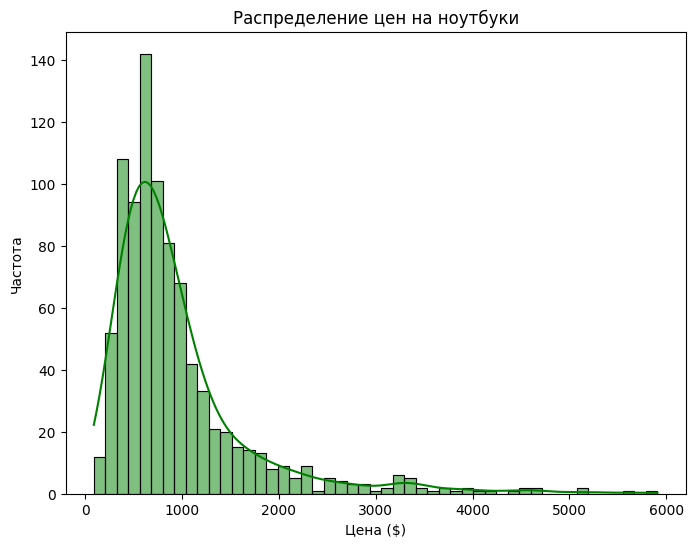

In [84]:
# Распределение цен
plt.figure(figsize=(8, 6))
sns.set_palette("Paired")
sns.histplot(df['Price'], kde = True, color = 'green')
plt.title('Распределение цен на ноутбуки')
plt.xlabel('Цена ($)')
plt.ylabel('Частота')
plt.show()


In [85]:
df['Price'].mode()[0]

np.float64(795.3)

In [86]:
df['Price'].mean()

np.float64(959.58359375)

In [87]:
df['Price'].median()

738.5

In [88]:
# Топ 10 брендов по количеству моделей
top_brands = df['Brand'].value_counts().head(10)
top_brands

,count
Brand,
Lenovo,211
HP,175
Asus,132
Dell,95
MSI,91
Acer,70
Samsung,21
Infinix,20
Apple,18


In [89]:
df.head()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1,HP,8,GB,15.6,512,6.0,12.0
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1,Tecno,8,GB,15.6,512,2.0,4.0
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1,Lenovo,8,GB,15.6,512,4.0,8.0
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Samsung,16,GB,13.3,512,12.0,16.0
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Xiaomi,16,GB,16.1,1024,24.0,32.0


In [90]:

# Топ 10 брендов и их средняя цена
# Общее количество брендов
brands_counts = df['Brand'].value_counts().reset_index()
# Средняя цена по всем брендам
avg_prices = df.groupby('Brand')['Price'].mean().round(1).reset_index()
# Обединение топ брендов со средней ценой
top_brands_avg_price = pd.merge(brands_counts, avg_prices, on='Brand').head(10)
top_brands_avg_price

,Brand,count,Price
0,Lenovo,211,825.7
1,HP,175,1041.8
2,Asus,132,792.5
3,Dell,95,1105.2
4,MSI,91,1445.9
5,Acer,70,660.1
6,Samsung,21,1327.2
7,Infinix,20,465.8
8,Apple,18,2154.3
9,Chuwi,8,316.7


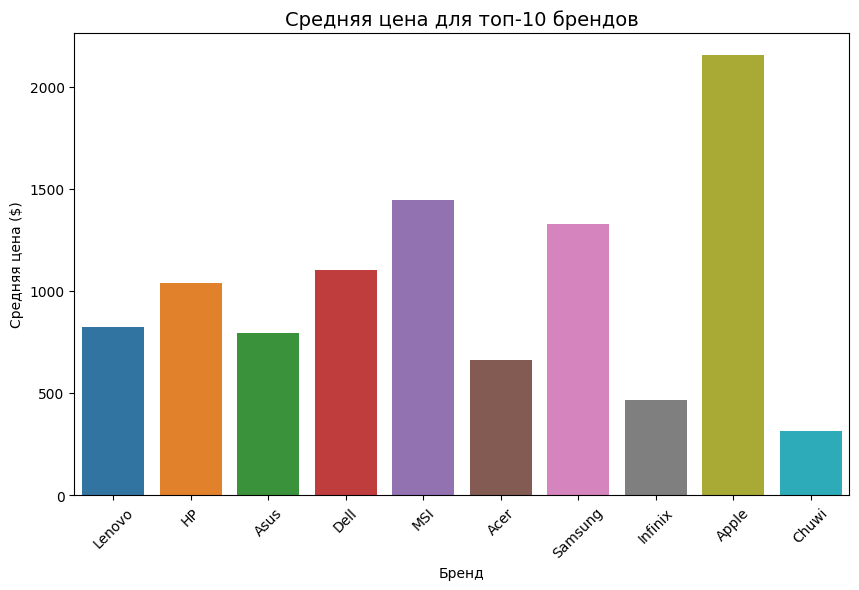

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brands_avg_price, x="Brand", y="Price", palette="tab10")
plt.title("Средняя цена для топ-10 брендов", fontsize=14)
plt.xlabel("Бренд")
plt.ylabel("Средняя цена ($)")
plt.xticks(rotation=45)
plt.show()

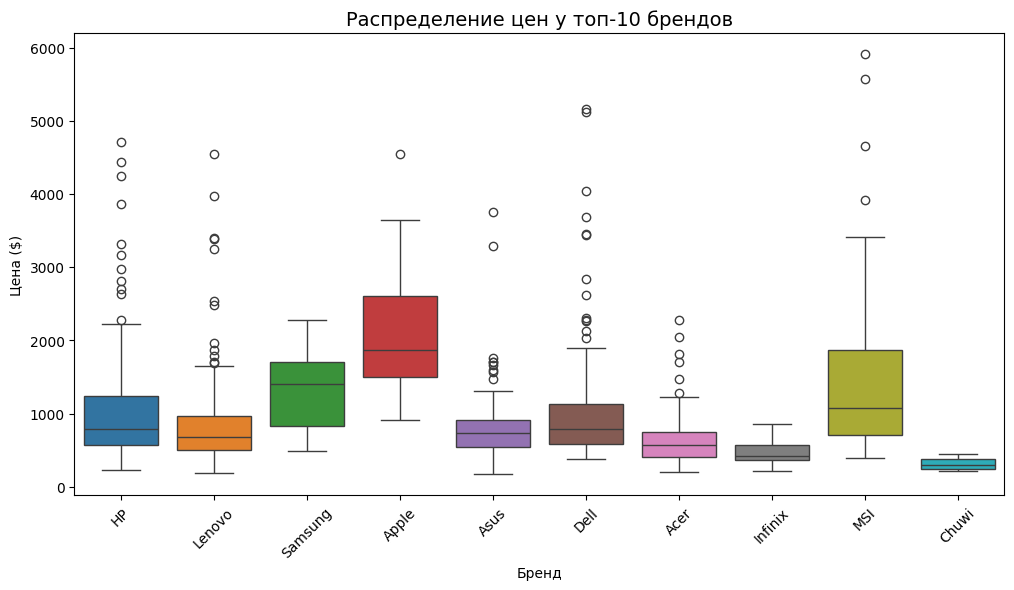

In [92]:
# Распределение цен на боксплоте
top_brands = df[df['Brand'].isin(top_brands_avg_price['Brand'])]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brands, x="Brand", y="Price", palette="tab10")
plt.title("Распределение цен у топ-10 брендов", fontsize=14)
plt.xlabel("Бренд")
plt.ylabel("Цена ($)")
plt.xticks(rotation=45)
plt.show()

In [93]:
# Топ-бренды по распределению рейтинга
rating = df.groupby('Brand')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
rating

,Brand,Rating
18,Ninkear,73.000000
6,Colorful,70.000000
28,‎HP,70.000000
14,LG,68.857143
12,Huawei,68.000000
9,Gigabyte,67.250000
16,MSI,66.507042
8,Fujitsu,64.000000
10,HP,63.589404
3,Asus,62.398305


In [94]:
# Распределение рейтинга среди топ-брендов
# Топ 10 брендов и их средний рейтинг

# Средний рейтинг по всем брендам
avg_rating = df.groupby('Brand')['Rating'].mean().round(1).reset_index()
# Обединение топ брендов со средним рейтингом
top_brands_avg_rating = pd.merge(brands_counts, avg_rating, on='Brand').head(10)
top_brands_avg_rating

,Brand,count,Rating
0,Lenovo,211,60.4
1,HP,175,63.6
2,Asus,132,62.4
3,Dell,95,59.5
4,MSI,91,66.5
5,Acer,70,59.9
6,Samsung,21,62.0
7,Infinix,20,54.1
8,Apple,18,56.8
9,Chuwi,8,50.5


In [95]:
laptops['Brand'] = laptops['Model'].apply(lambda x: x.split()[0])

In [96]:
laptops['Brand'][laptops['Rating'].isnull()].value_counts().head(10)

,count
Brand,
Lenovo,30
HP,24
MSI,21
Asus,14
Dell,14
Acer,14
Chuwi,6
Apple,4
Avita,4


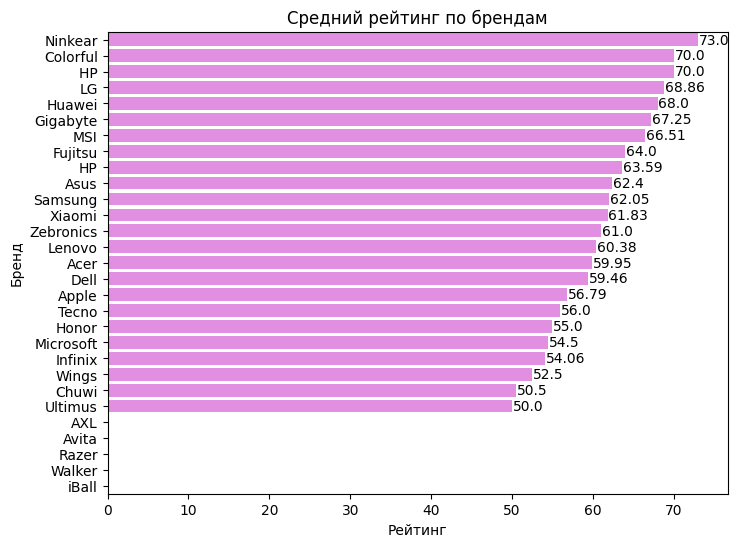

In [97]:
# Средний рейтинг по брендам
plt.figure(figsize=(8,6))
plt.title('Средний рейтинг по брендам')
sns.barplot(data=rating, x='Rating', y='Brand', color='violet')
for index, value in enumerate(rating['Rating'].round(2)):
    plt.text(value + 0.1, index, str(value), va='center')
plt.xlabel('Рейтинг')
plt.ylabel('Бренд')
plt.show()

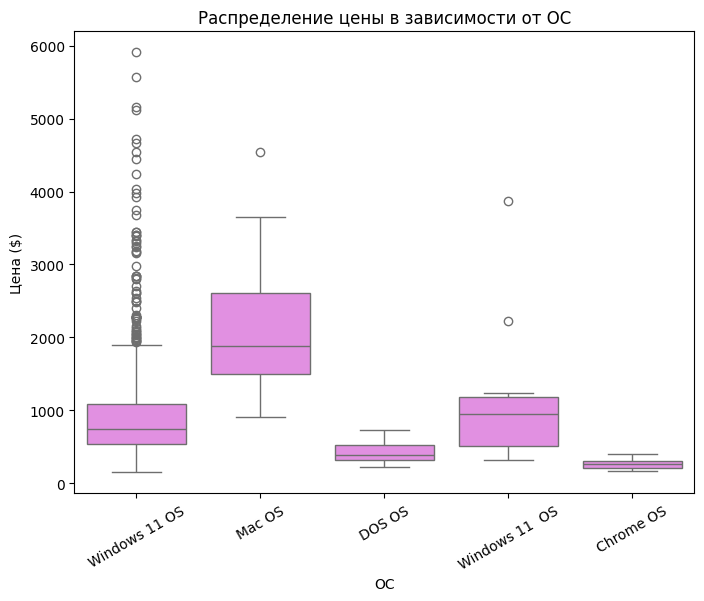

In [98]:
# Price distribution by top operating systems
top_os = df['OS'].value_counts().head(5).index
filtered_df = df[df['OS'].isin(top_os)]
plt.figure(figsize=(8,6))
plt.title('Распределение цены в зависимости от ОС')
sns.boxplot(x='OS', y='Price', data=filtered_df, color='violet')
plt.xlabel('ОС')
plt.ylabel('Цена ($)')
plt.xticks(rotation=30)
plt.show()

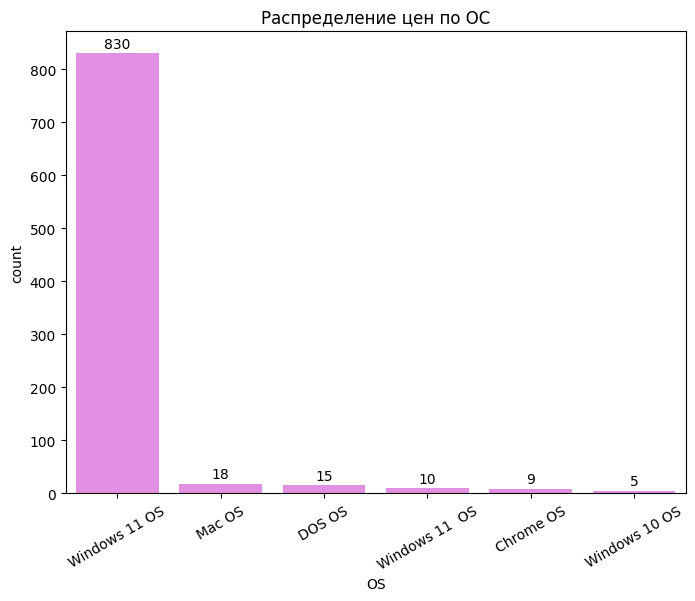

In [99]:
# Распредеение моделей по ОС
os = df['OS'].value_counts().reset_index().sort_values(by='count', ascending=False).head(6)
plt.figure(figsize=(8,6))
plt.title('Распределение цен по ОС')
sns.barplot(data=os, x='OS', y='count', color='violet')
for index, value in enumerate(os['count']):
    plt.text(index, value + 10, str(value), ha='center')
plt.xticks(rotation=30)
plt.show()

In [100]:
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1,HP,8,GB,15.6,512,6.0,12.0
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1,Tecno,8,GB,15.6,512,2.0,4.0
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1,Lenovo,8,GB,15.6,512,4.0,8.0
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Samsung,16,GB,13.3,512,12.0,16.0
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Xiaomi,16,GB,16.1,1024,24.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,738.5,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Asus,16,GB,16.0,512,8.0,12.0
916,Asus TUF Gaming A15 2023 FA577XV-HQ036WS Gamin...,1761.2,NaN,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 2560 x 1440 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Asus,16,GB,15.6,1024,8.0,16.0
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,795.3,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Acer,8,GB,14.0,512,10.0,12.0
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,623.9,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Lenovo,16,GB,15.6,512,4.0,8.0


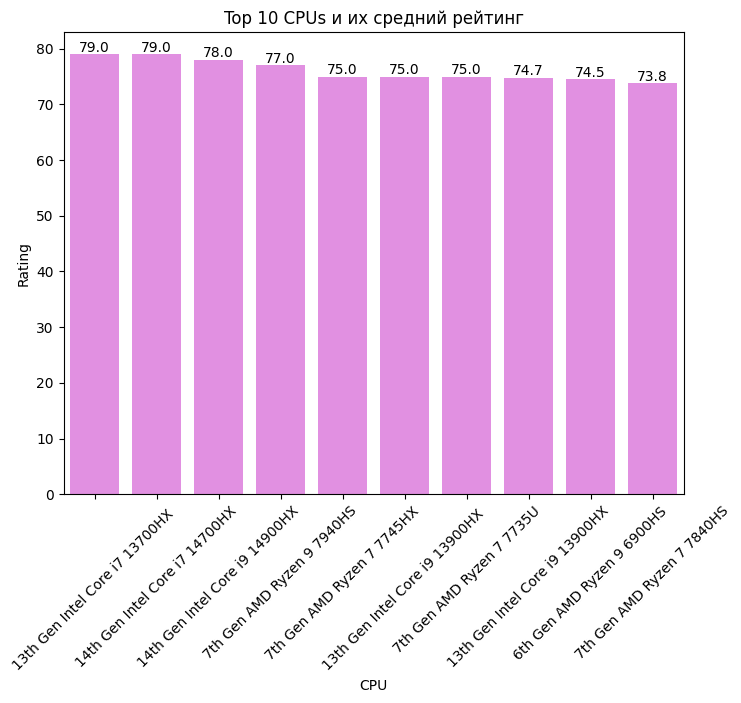

In [101]:
# Top 10 CPUs by average laptop rating
top_cpu = df.groupby('Generation')['Rating'].mean().round(1).sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(8,6))
plt.title('Top 10 CPUs и их средний рейтинг')
sns.barplot(data=top_cpu, x='Generation', y='Rating', color='violet')
plt.xlabel('CPU')
plt.ylabel('Rating')
plt.xticks(rotation=45)
for index, value in enumerate(top_cpu['Rating']):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.show()

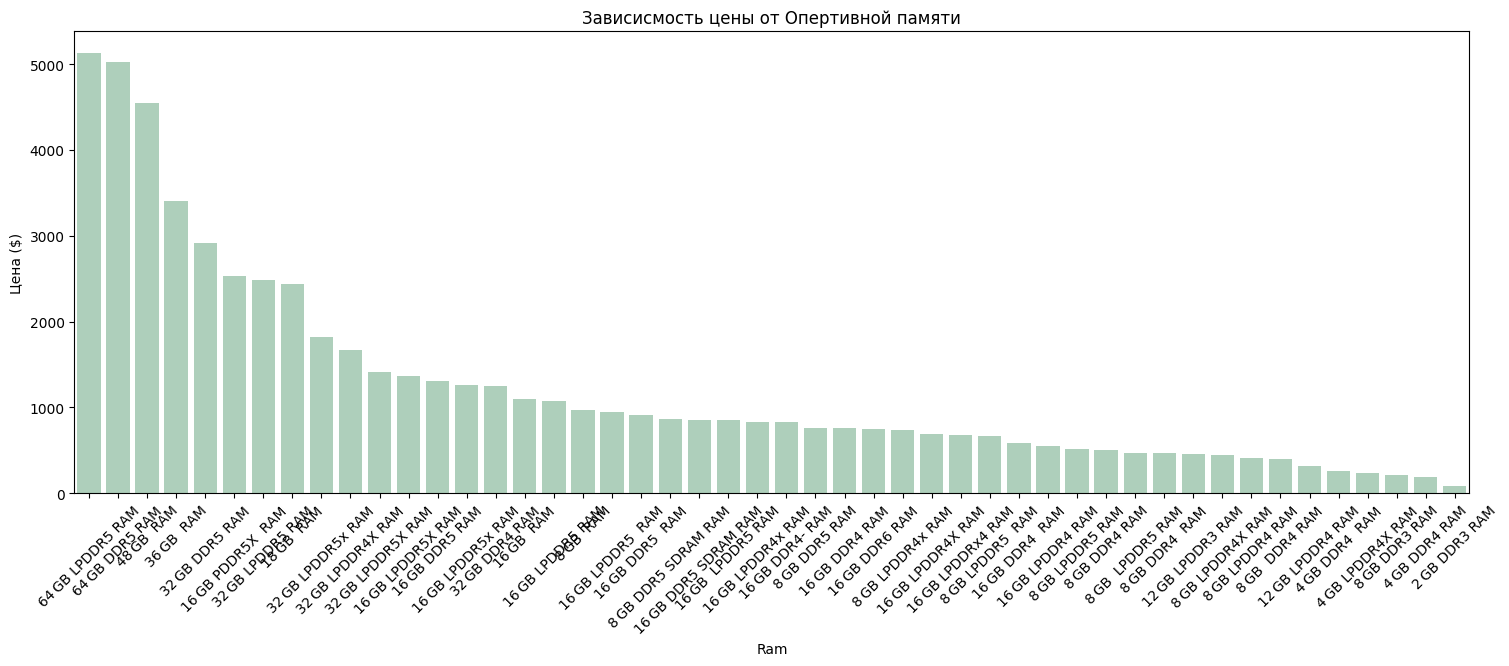

In [102]:
# 'Зависисмость цены от Опертивной памяти
avg_ram = df.groupby('Ram')['Price'].mean().round(0).sort_values(ascending=False).reset_index()
plt.figure(figsize=(18,6))
plt.title('Зависисмость цены от Опертивной памяти')
sns.barplot(data=avg_ram, x='Ram', y='Price', color='#A8D5BA')
plt.ylabel('Цена ($)')
plt.xticks(rotation=45)
plt.show()

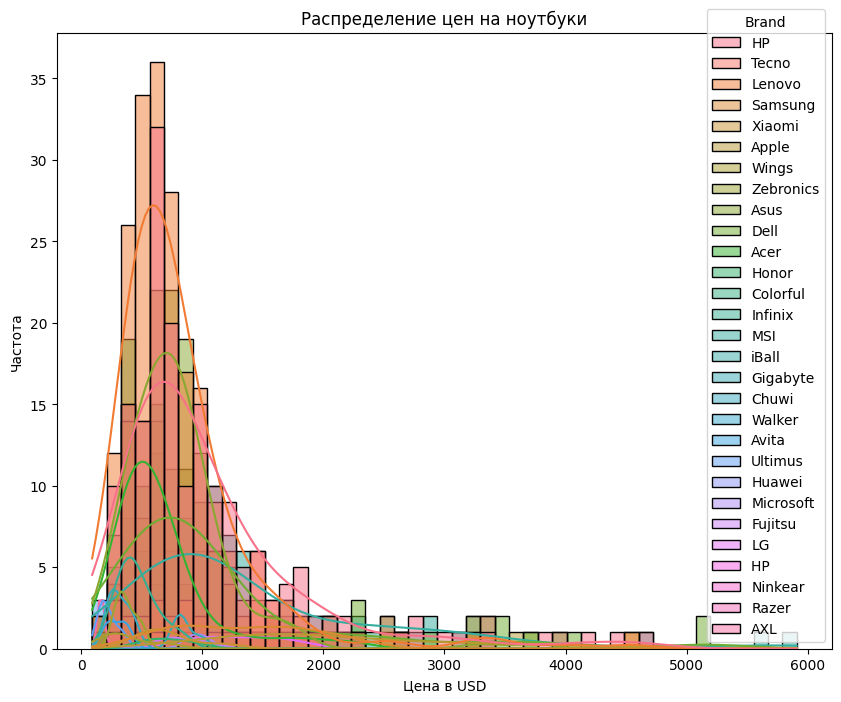

In [103]:
# Распределение цен по моделям
plt.figure(figsize=(10, 8))
sns.set_palette("bright")
sns.histplot(data = df, x='Price', kde = True, hue='Brand')
plt.title('Распределение цен на ноутбуки')
plt.xlabel('Цена в USD')
plt.ylabel('Частота')
plt.show()

In [104]:
# Top 10 brands by number of models
top_brands = df['Brand'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)

In [105]:
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1,HP,8,GB,15.6,512,6.0,12.0
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1,Tecno,8,GB,15.6,512,2.0,4.0
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1,Lenovo,8,GB,15.6,512,4.0,8.0
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Samsung,16,GB,13.3,512,12.0,16.0
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Xiaomi,16,GB,16.1,1024,24.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,738.5,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Asus,16,GB,16.0,512,8.0,12.0
916,Asus TUF Gaming A15 2023 FA577XV-HQ036WS Gamin...,1761.2,NaN,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 2560 x 1440 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Asus,16,GB,15.6,1024,8.0,16.0
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,795.3,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1,Acer,8,GB,14.0,512,10.0,12.0
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,623.9,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1,Lenovo,16,GB,15.6,512,4.0,8.0


## Outliers - работа с выбросами

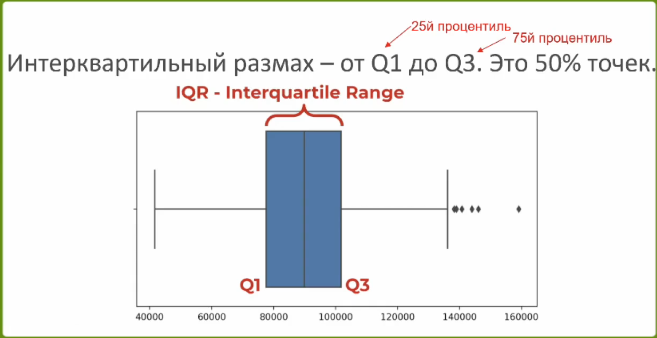

In [106]:
display(Image('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/Интерквартильный размах.png'))

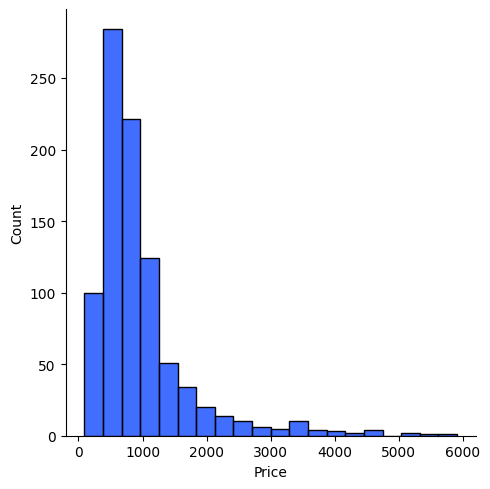

In [107]:
sns.displot(df['Price'], bins=20)

<Axes: xlabel='Price'>

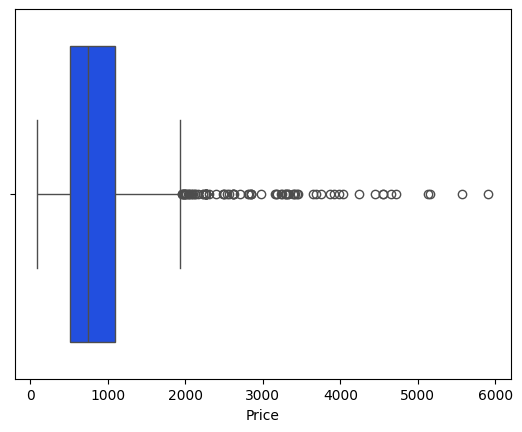

In [108]:
sns.boxplot(x=df['Price'])

In [109]:
prices = df['Price']
q75, q25 = np.percentile(prices, [75, 25])
iqr = q75 - q25
lower_limit = q25 - 1.5*iqr
upper_limit = q75 + 1.5*iqr

Процент выбросов в идеале меньше 1 процента. Например 10 процентов это уже и не выбросы

In [110]:
# Целевая переменная - цена
# Корреляция с другими колонками
df.corr(numeric_only=True)['Price']

,Price
Price,1.000000
Rating,0.571035
Warranty_years,0.224798
Ram_numeric,0.778385
Diagonal,0.255187
SSD_value,0.676989
CPU_cores,0.720743
CPU_threads,0.734123


Рассмотрим визуально на графиках выделяющиеся значения

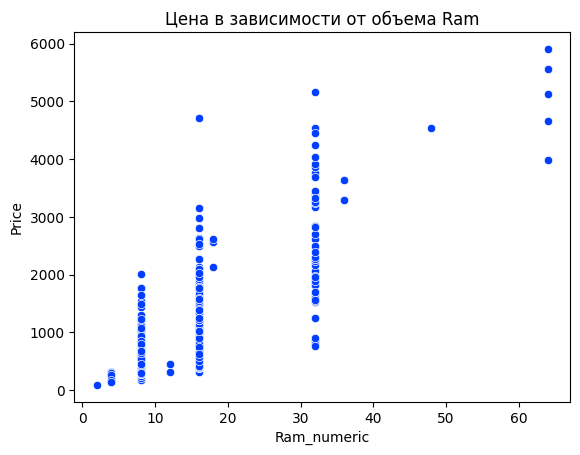

In [111]:
sns.scatterplot(data = df, y='Price', x = 'Ram_numeric')
plt.title('Цена в зависимости от объема Ram')
plt.show()

Есть потенциальный выброс - 32 гб и цена >5000

In [112]:
df[(df['Ram_numeric'] == 32) & (df['Price'] > 5000)]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
682,Dell Alienware X16 Gaming Laptop (13th Gen Cor...,5159.0,NaN,13th Gen Intel Core i9 13900HK,"14 Cores (6P + 8E), 20 Threads",32 GB LPDDR5 RAM,2 TB SSD,"16 inches, 3200 x 1800 pixels",16 GB NVIDIA GeForce RTX 4090,Windows 11 OS,1,Dell,32,GB,16.0,2048,14.0,20.0


Ну у него и SSD на 2TB

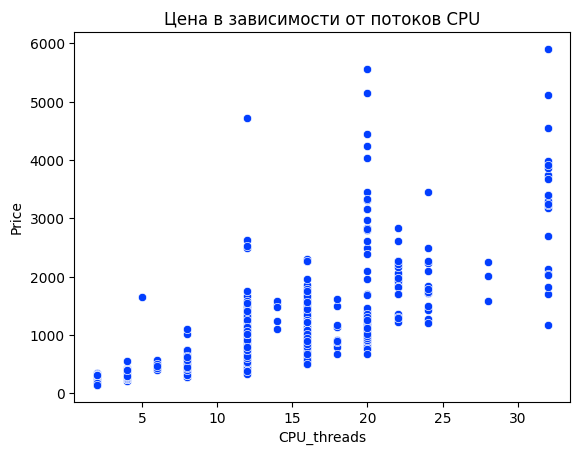

In [113]:
sns.scatterplot(data = df, y='Price', x = 'CPU_threads')
plt.title('Цена в зависимости от потоков CPU')
plt.show()

Есть потенциальный выброс - 5 ядер и цена >1000

In [114]:
df[(df['CPU_threads'] == 5) & (df['Price'] > 1000)]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
308,Lenovo ThinkPad X1 Fold Gen 1 Laptop (Intel Co...,1647.7,57.0,11th Gen Intel Core i5 L16G7,"5 Cores, 5 Threads",8 GB LPDDR4X RAM,1 TB SSD,"13.3 inches, 2048 x 1536 pixels, Touch Screen",Intel Integrated Graphics,Windows 10 OS,1,Lenovo,8,GB,13.3,1024,5.0,5.0


32 ядра и цена < 1500

In [115]:
df[(df['CPU_threads'] == 32) & (df['Price'] <1500 )]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1,Xiaomi,16,GB,16.1,1024,24.0,32.0


Явно занижена цена у ноутбука сверху/ SSD на 1TB и Ram 16 gb - при этом рейтинг высокий

20 ядер и цена > 5000

In [116]:
df[(df['CPU_threads'] == 20) & (df['Price'] > 5000)]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
202,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th...,5566.9,NaN,13th Gen Intel Core i9 13900H,"14 Cores (6P + 8E), 20 Threads",64 GB DDR5 RAM,2 TB SSD,"17.3 inches, 3840 x 2160 pixels",12 GB Nvidia GeForce RTX4080,Windows 11 OS,2,MSI,64,GB,17.3,2048,14.0,20.0
682,Dell Alienware X16 Gaming Laptop (13th Gen Cor...,5159.0,NaN,13th Gen Intel Core i9 13900HK,"14 Cores (6P + 8E), 20 Threads",32 GB LPDDR5 RAM,2 TB SSD,"16 inches, 3200 x 1800 pixels",16 GB NVIDIA GeForce RTX 4090,Windows 11 OS,1,Dell,32,GB,16.0,2048,14.0,20.0


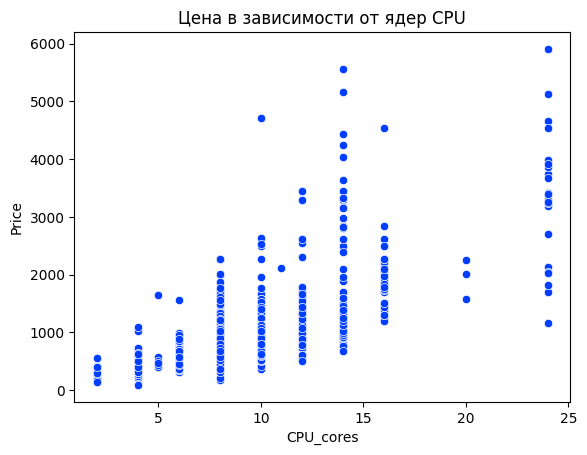

In [117]:
sns.scatterplot(data = df, y='Price', x = 'CPU_cores')
plt.title('Цена в зависимости от ядер CPU')
plt.show()

In [118]:
df[(df['CPU_cores'] == 14) & (df['Price'] > 5000)]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
202,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th...,5566.9,NaN,13th Gen Intel Core i9 13900H,"14 Cores (6P + 8E), 20 Threads",64 GB DDR5 RAM,2 TB SSD,"17.3 inches, 3840 x 2160 pixels",12 GB Nvidia GeForce RTX4080,Windows 11 OS,2,MSI,64,GB,17.3,2048,14.0,20.0
682,Dell Alienware X16 Gaming Laptop (13th Gen Cor...,5159.0,NaN,13th Gen Intel Core i9 13900HK,"14 Cores (6P + 8E), 20 Threads",32 GB LPDDR5 RAM,2 TB SSD,"16 inches, 3200 x 1800 pixels",16 GB NVIDIA GeForce RTX 4090,Windows 11 OS,1,Dell,32,GB,16.0,2048,14.0,20.0


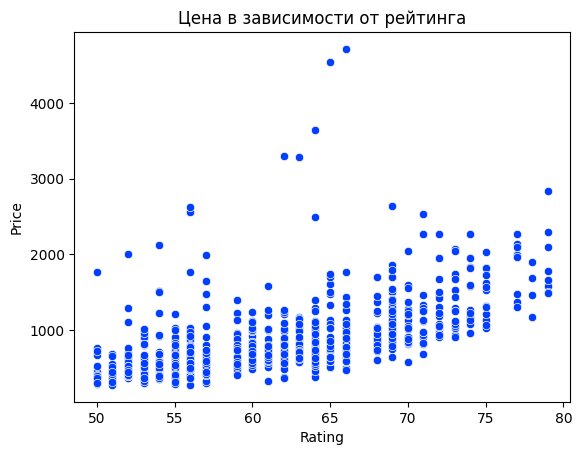

In [119]:
sns.scatterplot(data = df, y='Price', x = 'Rating')
plt.title('Цена в зависимости от рейтинга')
plt.show()

In [120]:
df[(df['Rating'] < 65) & (df['Price'] > 3000)]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
158,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max...,3644.2,64.0,Apple M3 Max,14 Cores (10P + 4E),36 GB RAM,1 TB SSD,"16.2 inches, 3456 x 2234 pixels",30 Core GPU,Mac OS,1,Apple,36,GB,16.2,1024,14.0,NaN
355,Apple MacBook Pro 16 2023 Laptop (Apple M3 Pro...,3294.3,62.0,Apple M3 Pro,12 Cores (6P + 6E),36 GB RAM,512 GB SSD,"16.2 inches, 3456 x 2234 pixels",18 Core GPU,Mac OS,1,Apple,36,GB,16.2,512,12.0,NaN
359,Apple MacBook Pro 14 2023 Laptop (Apple M3 Max...,3291.9,63.0,Apple M3 Max,14 Cores (10P + 4E),36 GB RAM,1 TB SSD,"14.2 inches, 3024 x 1964 pixels",30 Core GPU,Mac OS,1,Apple,36,GB,14.2,1024,14.0,NaN


Есть значения 2-3 которые постоянно выбиваются - проверить одни и те же ли это данные

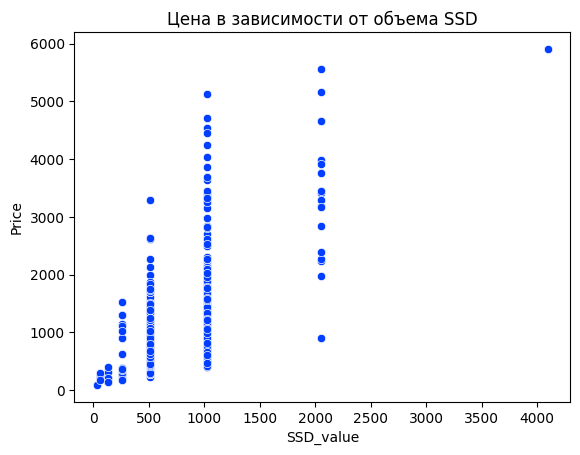

In [121]:
sns.scatterplot(data = df, y='Price', x = 'SSD_value')
plt.title('Цена в зависимости от объема SSD')
plt.show()

In [122]:
df[(df['SSD_value'] < 2500) & (df['Price'] > 5000)]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
202,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th...,5566.9,NaN,13th Gen Intel Core i9 13900H,"14 Cores (6P + 8E), 20 Threads",64 GB DDR5 RAM,2 TB SSD,"17.3 inches, 3840 x 2160 pixels",12 GB Nvidia GeForce RTX4080,Windows 11 OS,2,MSI,64,GB,17.3,2048,14.0,20.0
682,Dell Alienware X16 Gaming Laptop (13th Gen Cor...,5159.0,NaN,13th Gen Intel Core i9 13900HK,"14 Cores (6P + 8E), 20 Threads",32 GB LPDDR5 RAM,2 TB SSD,"16 inches, 3200 x 1800 pixels",16 GB NVIDIA GeForce RTX 4090,Windows 11 OS,1,Dell,32,GB,16.0,2048,14.0,20.0
687,Dell Alienware M18 R1 2023 Gaming Laptop (13th...,5124.9,NaN,13th Gen Intel Core i9 13980HX,"24 Cores (8P + 16E), 32 Threads",64 GB LPDDR5 RAM,1 TB SSD,"18 inches, 3200 x 1800 pixels",16 GB NVIDIA GeForce RTX 4090,Windows 11 OS,1,Dell,64,GB,18.0,1024,24.0,32.0


In [123]:
# непонятно почему такая нзкая цена при таких высоких показателях
df[(df['SSD_value'] > 2000) & (df['Price'] < 1000)]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
780,Ninkear A16 Gaming Laptop (AMD Ryzen 7 7735HS/...,909.1,73.0,7th Gen AMD Ryzen 7 7735HS,"Octa Core, 16 Threads",32 GB DDR5 RAM,2 TB SSD,"16 inches, 2560 x 1600 pixels",AMD Radeon 680M,Windows 11 OS,1,Ninkear,32,GB,16.0,2048,8.0,16.0


По итогу можно выделить ноутбук под индексом 682 - он чаще других встречается в выборке

In [124]:
df.drop(682, inplace=True)

In [125]:
df.reset_index(drop=True, inplace=True)

In [126]:
df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop_clean.csv')

## Missing data

In [127]:
# отстуствующие данные в процентах
def percent_missing(my_df):
  result = 100*my_df.isnull().sum()/len(my_df)
  result = result[result>0].sort_values()
  return result


In [128]:
percent_nan = percent_missing(df)

In [129]:
percent_nan

,0
CPU_cores,0.111732
CPU_threads,3.687151
Rating,16.089385


<Axes: xlabel='None', ylabel='None'>

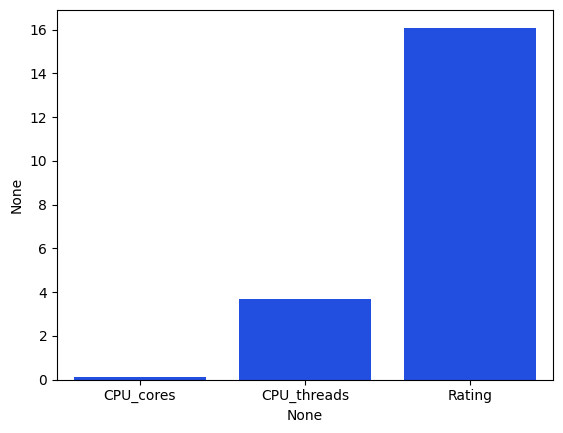

In [130]:
sns.barplot(x=percent_nan.index, y=percent_nan)

In [131]:
3.583427/100/len(df)

4.0038290502793294e-05

In [132]:
df[df['CPU_cores'].isnull()]

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
527,Asus TUF Gaming F15 90NR0GW1-M00F00 Laptop (12...,988.5,60.0,12th Gen Intel Core i7 12700H,20 Threads,16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 1920 x 1080 pixels",4 GB ‎NVIDIA GeForce RTX 3050,Windows 11 OS,1,Asus,16,GB,15.6,1024,NaN,20.0


In [133]:
df = df.dropna(axis=0, subset='CPU_cores')

In [134]:
percent_nan = percent_missing(df)

In [135]:
percent_nan

,0
CPU_threads,3.691275
Rating,16.107383


In [136]:
# в данных моделях отсутсвуют данные о потоках
len(df[df['CPU_threads'].isnull()])

33

У моделей MacBook 2023–2024 гг. на чипах Apple Silicon количество потоков всегда равно числу физических ядер, потому что у архитектуры Apple нет аналога Intel Hyper-Threading.
То есть 1 ядро = 1 поток. Поэтому можеv заполнить значениями равными числу ядер

In [137]:
df['CPU_threads']

,CPU_threads
0,12.0
1,4.0
2,8.0
3,16.0
4,32.0
...,...
890,12.0
891,16.0
892,12.0
893,8.0


In [138]:
df['CPU_threads'][df['Brand'] == 'Apple'] = df['CPU_cores'][df['Brand'] == 'Apple']

In [139]:
# проверим теперь
df[df['CPU_threads'].isnull()]['Model'].to_list()

['Dell G15-5530 15 2023 Gaming Laptop (13th Gen Core i7/ 16GB/ 1TB SSD/ Win11/ 6GB Graph)',
 'iBall Excelance CompBook Laptop (AQC/ 2GB/ 32GB/Win10)',
 'Dell G15-5530 GN5530194YM001ORB1 Gaming Laptop (13th Gen Core i7/ 16GB/ 1TB SSD/ Win11/ RTX 3050 6GB Graph)',
 'Lenovo Ideapad Slim 3 Chrome 14M868 82XJ002LHA Laptop (MediaTek Kompanio 520/ 4GB/ 128GB eMMC/ Chrome OS)',
 'Lenovo Ideapad Slim 3 Chrome 14M868 82XJ002RHA Laptop (MediaTek Kompanio 520/ 8GB/ 128GB eMMC/ Chrome OS)',
 'Lenovo LOQ 15IRX9 83DV007HIN Gaming Laptop (13th Gen Core i7/ 16GB/ 512GB SSD/ Win11/ 6GB Graph)',
 'Asus Chromebook CM14 CM1402CM2A-EK0085 Laptop (MediaTek Kompanio 520/ 8GB/ 128GB eMMC/ Chrome OS)',
 'Asus BR1100CKA-GJ0746W Laptop (Celeron N4500/ 8GB/ 128GB SSD/ Win11 Home)',
 'MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13th Gen Core i9/ 64GB/ 2TB SSD/ Win11/ RTX 3000 Ada)',
 'Dell 2023 \u200eG16-7630 Gaming Laptop (13th Gen Core i7/ 32GB/ 1TB SSD/ Win11/ 8GB Graph)',
 'Dell \u200eG16-7630 2023 Gaming Lapto

In [140]:
len(df[df['CPU_threads'].isnull()])

15

В процессорах 13th Gen Core i7 в среднем случае от 16 до 24 потоков - возьмем среднее - 20 потоков

In [141]:
mask = df['Generation'].str.contains('13th Gen Intel Core i7', case=False, na=False, regex=False)


In [142]:
df.loc[mask, 'CPU_threads'] = df.loc[mask, 'CPU_threads'] = df.loc[mask, 'CPU_threads'].fillna(20)

In [143]:
# проверим теперь
df[df['CPU_threads'].isnull()]['Generation'].to_list()

['Intel Atom Quad Core Z3735F',
 'MediaTek Kompanio 520 Kompanio 520',
 'MediaTek Kompanio 520 Kompanio 520',
 'MediaTek Kompanio Kompanio 520',
 'Intel Celeron  N4500',
 '13th Gen Intel Core i9 13950HX']

In [144]:
percent_nan = percent_missing(df)
percent_nan

,0
CPU_threads,0.671141
Rating,16.107383


MediaTek Kompanio 520 – это мобильный ARM-чип.
Для ARM-процессоров это стандартно: количество потоков всегда равно числу ядер

In [145]:
mask = df['Generation'].str.contains('MediaTek Kompanio')
df.loc[mask, 'CPU_threads'] = df.loc[mask, 'CPU_threads'] = df.loc[mask, 'CPU_threads'].fillna(20)

In [146]:
# проверим теперь
df[df['CPU_threads'].isnull()]['Generation'].to_list()

['Intel Atom Quad Core Z3735F',
 'Intel Celeron  N4500',
 '13th Gen Intel Core i9 13950HX']

Так же погуглив, узнаем, что

Atom Z3735F → 4 потока

Celeron N4500 → 2 потока

Core i9-13950HX → 32 потока


In [147]:
df['CPU_threads'][df['Generation'] == 'Intel Atom Quad Core Z3735F'] = 4
df['CPU_threads'][df['Generation'] == 'Intel Celeron  N4500'] = 2
df['CPU_threads'][df['Generation'] == '13th Gen Intel Core i9 13950HX'] = 32

In [148]:
percent_nan = percent_missing(df)
percent_nan

,0
Rating,16.107383


Что делать с рейтингом.

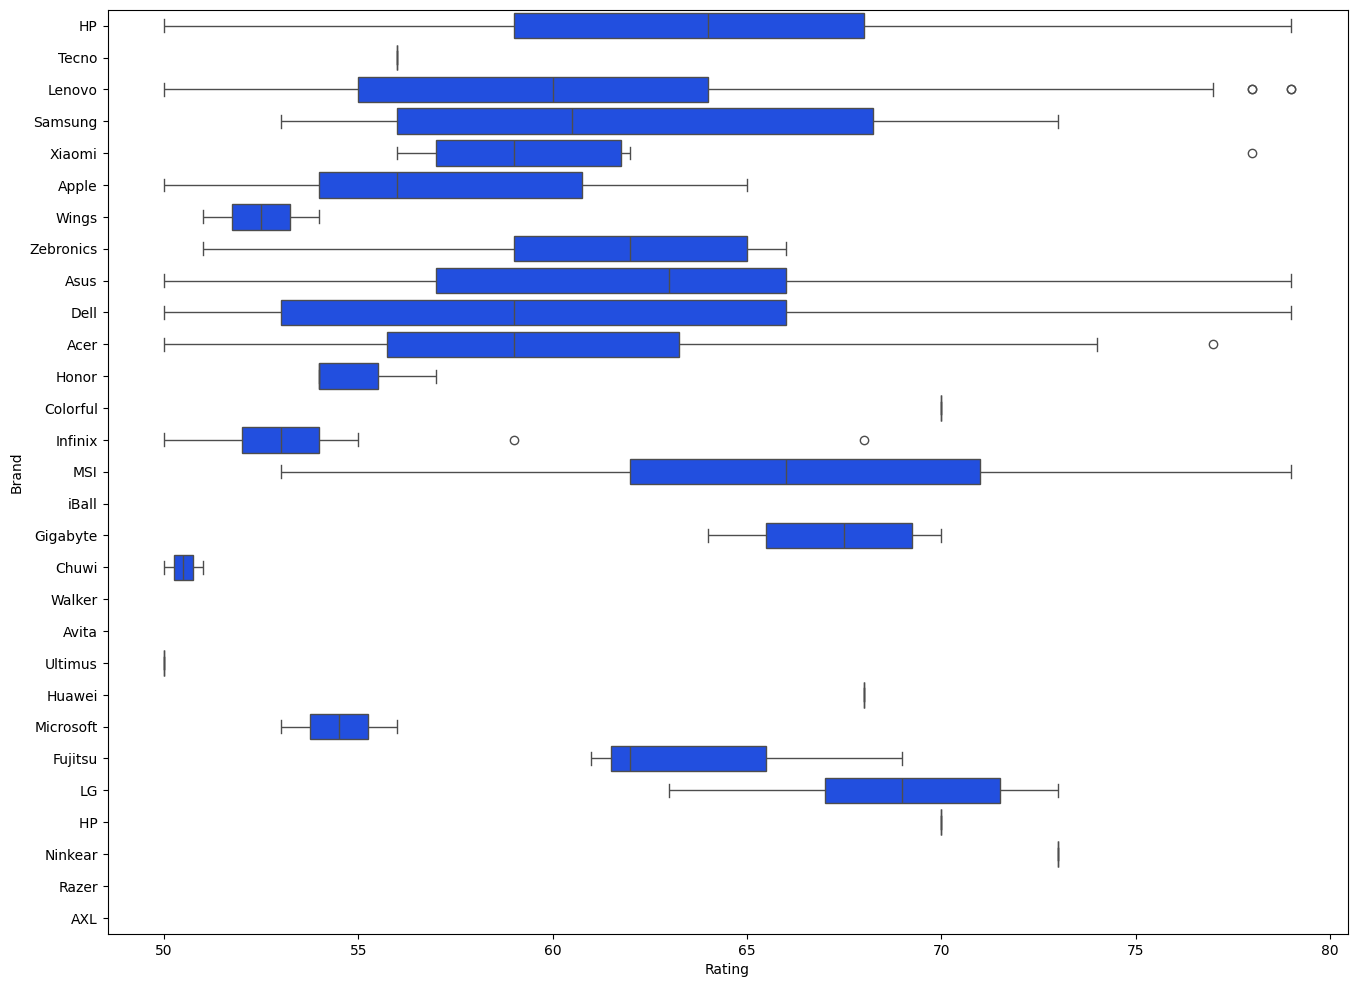

In [160]:
# можно взять среднее по бренду для начала
plt.figure(figsize=(16,12), dpi=100)
sns.boxplot(x = df['Rating'], y=df['Brand'], data=df,orient='horizontal')
plt.show()

In [165]:
# получаем средний рейтинг для каждого бренда
df.groupby('Brand')['Rating'].mean()


,Rating
Brand,
AXL,NaN
Acer,59.946429
Apple,56.785714
Asus,62.418803
Avita,NaN
Chuwi,50.500000
Colorful,70.000000
Dell,59.456790
Fujitsu,64.000000


In [166]:
# применим transformer для замены на сгруппированные данные
df['Rating'] = df.groupby('Brand')['Rating'].transform(lambda value: value.fillna(value.mean()))

In [167]:
df['Rating'].isnull().sum()

np.int64(9)

In [168]:
# оставшиеся 3 заменим просто усредненными значениями
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [169]:
percent_nan = percent_missing(df)
percent_nan

,0


## Категориальные переменные

In [175]:
df['Warranty_years'].value_counts()

,count
Warranty_years,
1,804
2,74
3,16


In [176]:
df_objects_dummies = pd.get_dummies(df['Warranty_years']) # drop_first=True

In [177]:
df_objects_dummies

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
890,True,False,False
891,True,False,False
892,True,False,False
893,True,False,False


In [149]:
#final_df = pd.concat([df, df_objects_dummies], axis=1)

In [179]:
df.corr(numeric_only=True)['Price'].sort_values()

,Price
Diagonal,0.254584
Rating,0.402115
SSD_value,0.669425
CPU_threads,0.697083
CPU_cores,0.726266
Ram_numeric,0.779448
Price,1.000000


m

In [150]:
# Целевая переменная - цена
prices = df['Price']
prices

,Price
0,572.7
1,272.6
2,306.7
3,795.3
4,1170.3
...,...
890,738.5
891,1761.2
892,795.3
893,623.9


# Price Prediction Model

Linear Regression Model R^2 score: 0.44275901285728914


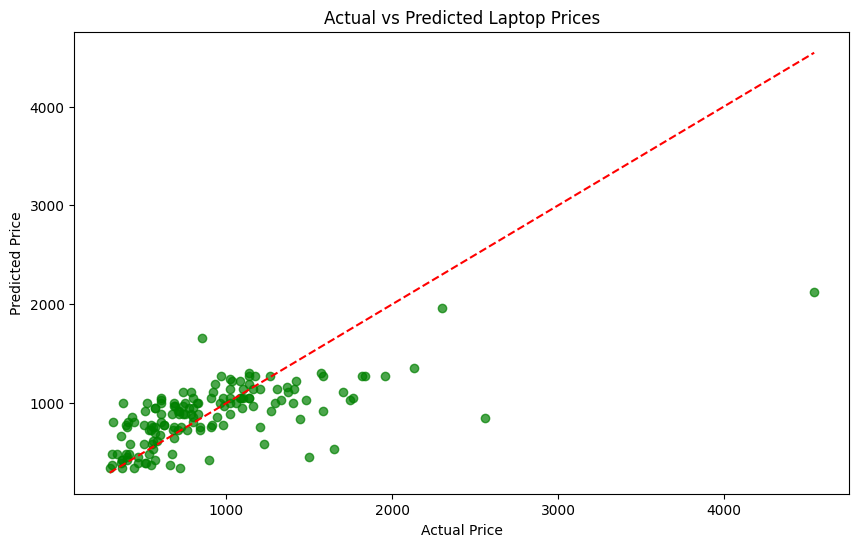

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score

predictor_features = ['Rating', 'Ram_numeric']

if any([col not in df.columns for col in predictor_features]):
    print('One or more predictor features are missing from the dataset. Check the column names.')
else:
    X = df[predictor_features].dropna()
    y = df.loc[X.index, 'Price']

    # Разделяем датасет на training и test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict и расчет R^2
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print('Linear Regression Model R^2 score:', score)

    # Plotting the Actual vs Predicted Prices
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='green')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Laptop Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

In [154]:
df.shape

(894, 18)